In [ ]:
# dataset @ https://finance.yahoo.com/quote/SIDO/history/

In [2]:
import pandas as pd
df = pd.read_csv('SIDO.csv')
df = df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
4/1/2019,493.730865,501.174042,493.730865,498.692963,401.449799,921783
4/2/2019,496.211914,501.174042,493.730865,496.211914,399.452545,4289296
4/3/2019,496.211914,496.211914,496.211914,496.211914,399.452545,0
4/4/2019,496.211914,498.692963,491.249786,493.730865,397.455322,7317035
4/5/2019,496.211914,501.174042,493.730865,498.692963,401.449799,3768954
...,...,...,...,...,...,...
3/25/2024,630.000000,630.000000,615.000000,620.000000,620.000000,18009000
3/26/2024,625.000000,625.000000,615.000000,615.000000,615.000000,19549200
3/27/2024,620.000000,635.000000,620.000000,625.000000,625.000000,38585400


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,713.548705,722.666519,703.205866,712.387274,644.013050,1.990939e+07
std,140.974088,141.902977,139.573044,140.545980,140.117521,2.527117e+07
min,454.033905,466.439209,446.590729,456.514954,375.260315,0.000000e+00
25%,605.378540,613.910858,595.454285,605.000000,522.703369,7.136814e+06
50%,730.000000,740.000000,720.000000,730.000000,665.725464,1.301910e+07
75%,793.939087,798.901184,784.014832,790.000000,721.372864,2.325767e+07
max,1050.000000,1070.000000,1040.000000,1050.000000,954.029785,3.746476e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 4/1/2019 to 4/1/2024
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1227 non-null   float64
 1   High       1227 non-null   float64
 2   Low        1227 non-null   float64
 3   Close      1227 non-null   float64
 4   Adj Close  1227 non-null   float64
 5   Volume     1227 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 99.4+ KB


In [ ]:
# Get the number of rows and columns in the data set
df.shape

(1227, 6)

In [8]:
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

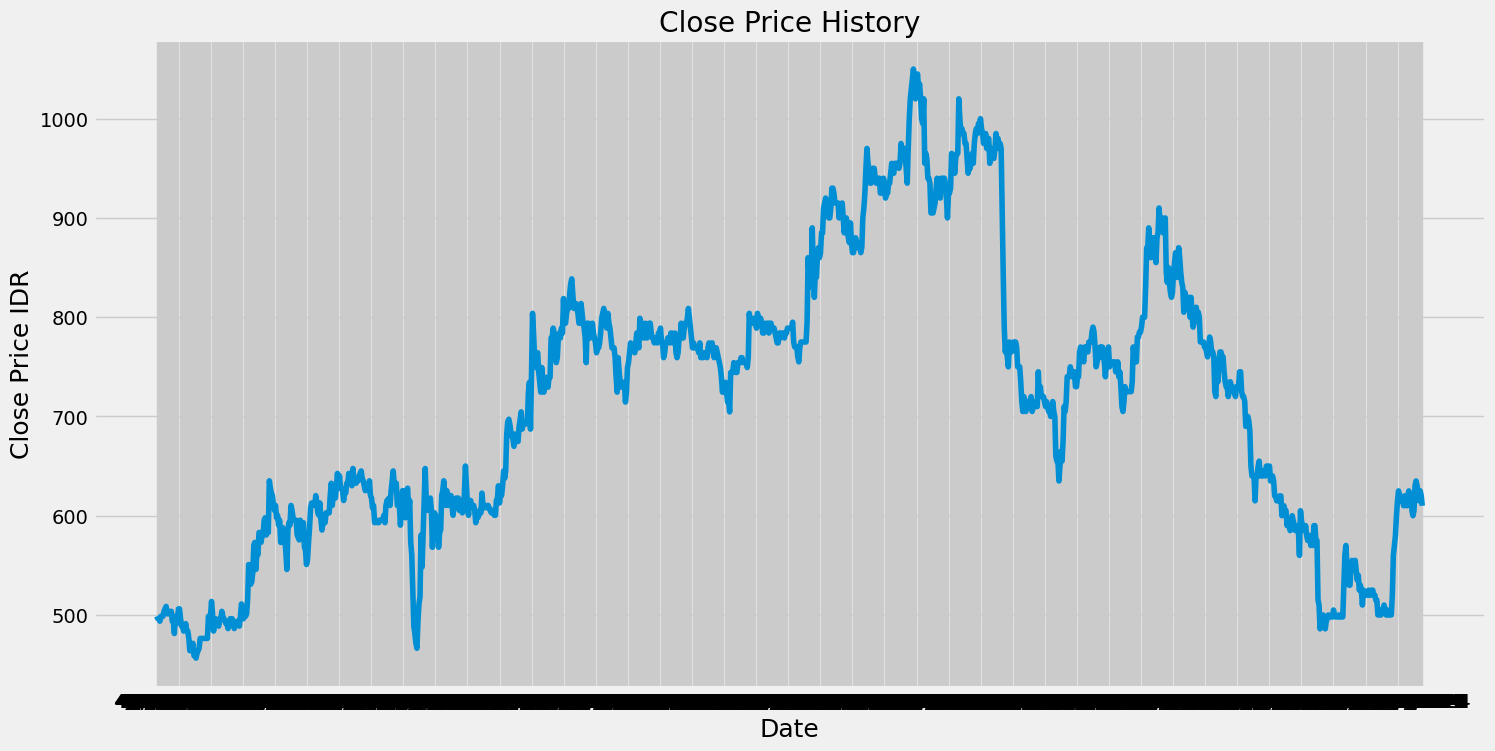

In [9]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)
plt.show()
#bagian ini using excel aja biar keliatan date nya

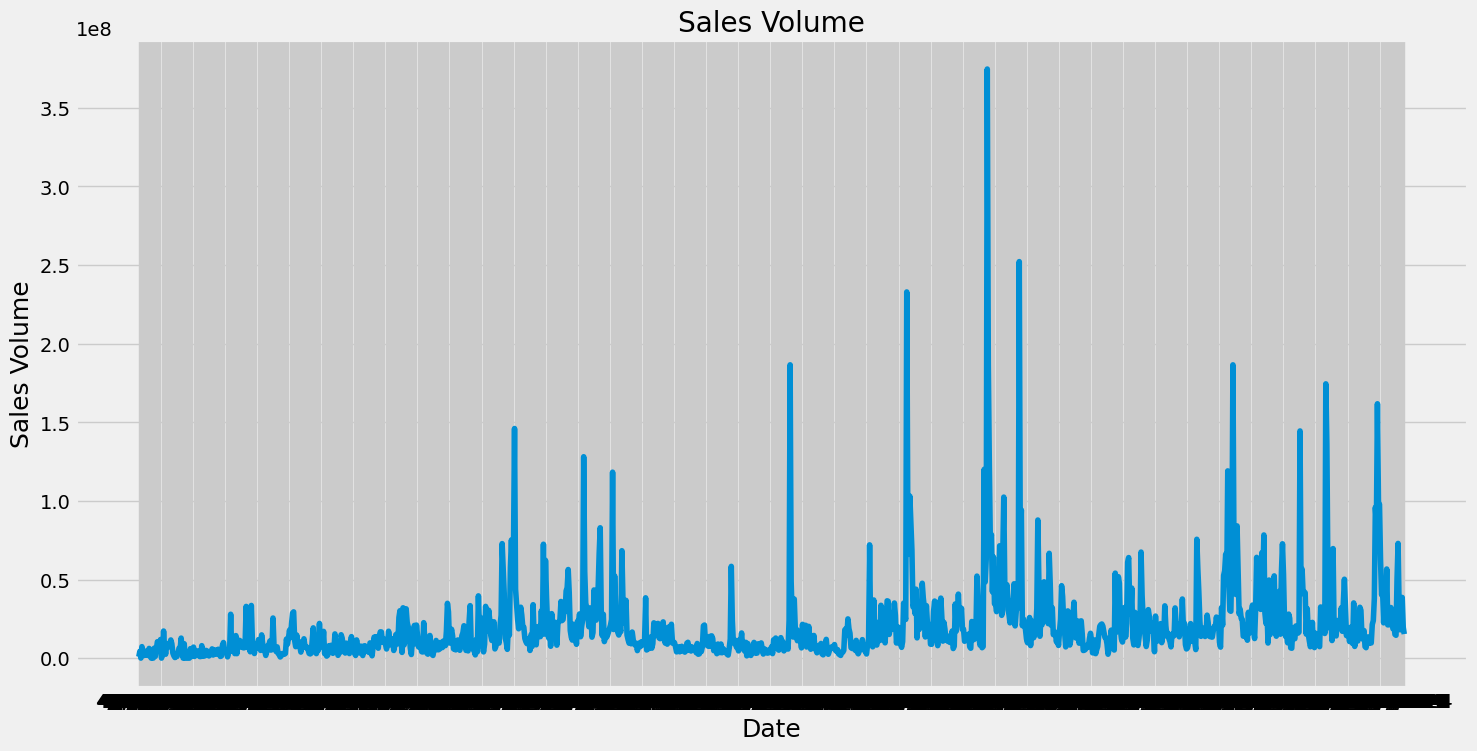

In [10]:
#Visualize the volume of stock being traded history
plt.figure(figsize=(16,8))
plt.title('Sales Volume')
plt.plot(df['Volume'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Sales Volume', fontsize=18)
plt.show()
#bagian ini using excel aja biar keliatan date nya

In [11]:
# Create a new dataframe with only the close columns
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

982

In [12]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.07106836],
       [0.06688789],
       [0.06688789],
       ...,
       [0.28389097],
       [0.27546616],
       [0.25861653]])

In [13]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x-train and y_train dataset
x_train = []
y_train = []

for i in range(10, len(train_data)):
  x_train.append(train_data[i-10:i, 0])
  y_train.append(train_data[i, 0])
  if i<=11:
    print(x_train)
    print(y_train)
    print()

[array([0.07106836, 0.06688789, 0.06688789, 0.06270741, 0.07106836,
       0.07106836, 0.07106836, 0.07942936, 0.08360988, 0.08779036])]
[0.07524888504098892]

[array([0.07106836, 0.06688789, 0.06688789, 0.06270741, 0.07106836,
       0.07106836, 0.07106836, 0.07942936, 0.08360988, 0.08779036]), array([0.06688789, 0.06688789, 0.06270741, 0.07106836, 0.07106836,
       0.07106836, 0.07942936, 0.08360988, 0.08779036, 0.07524889])]
[0.07524888504098892, 0.07524888504098892]



In [14]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(972, 10, 1)

In [16]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

972/972 [==============================] - 10s 7ms/step - loss: 0.0052


In [ ]:
#Create the testing dataset
#Create a new array containing scaled value from index 914 to 1217
test_data = scaled_data[training_data_len - 10: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
  x_test.append(test_data[i-10:i, 0])

In [ ]:
#Convert the data to numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 7ms/step


In [ ]:
#Get the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.9292999890385842

<ipython-input-27-a5958693ba3e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


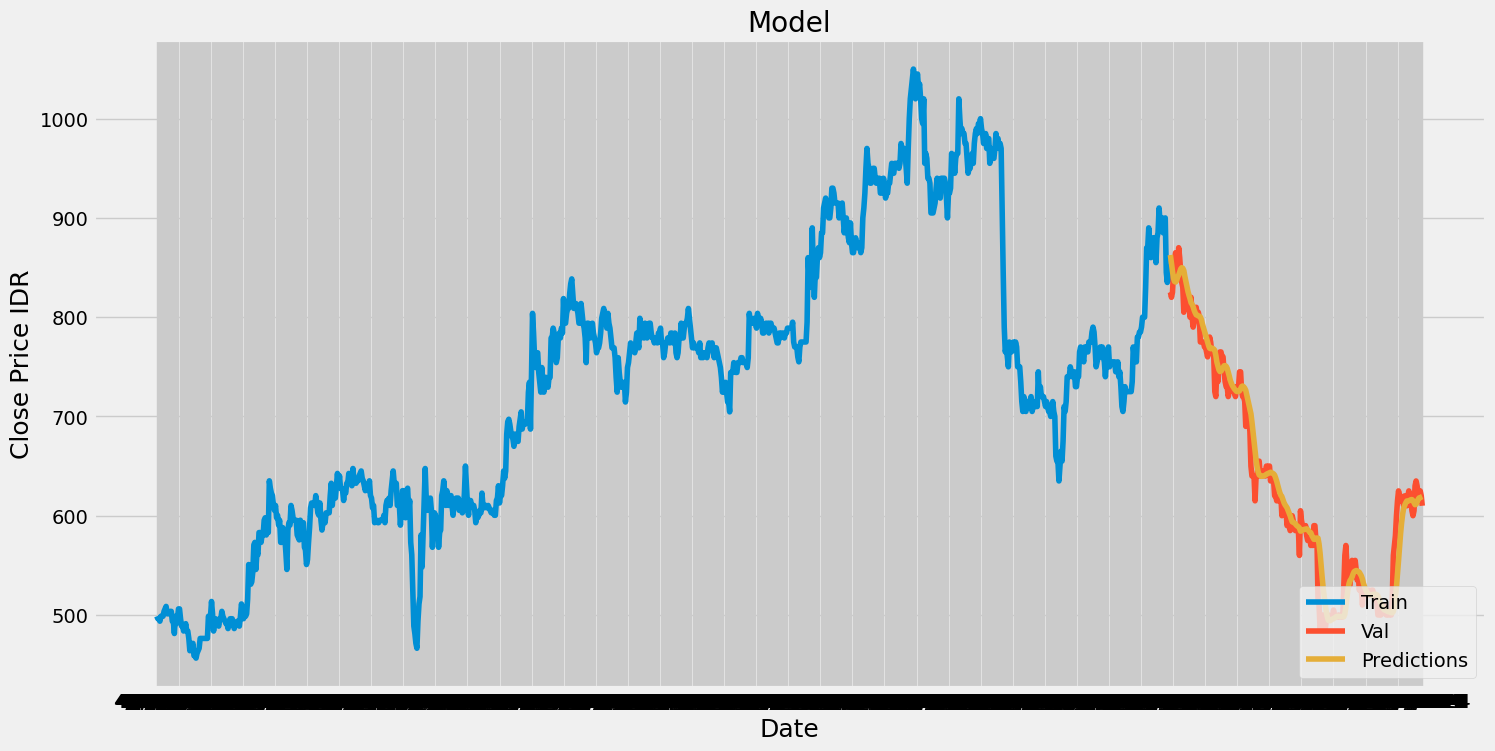

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
3/17/2023,825.0,862.661499
3/20/2023,820.0,854.574341
3/21/2023,825.0,846.308655
3/24/2023,845.0,839.296204
3/27/2023,855.0,835.966797
...,...,...
3/25/2024,620.0,616.530334
3/26/2024,615.0,617.958923
3/27/2024,625.0,618.111755


In [ ]:
#Get the quote
SIDO_quote = pd.read_csv('SIDO.csv')

#Create a new dataframe
new_df = SIDO_quote.filter(['Close'])

#Get the last 10 days closing price values and convert the dataframe to an array
last_10_days = new_df[-10:].values

#Scale the data to be values between 0 and 1
last_10_days_scaled = scaler.transform(last_10_days)

#Create an empty list
X_test = []

#append the past 10 days
X_test.append(last_10_days_scaled)

#Convert the x_test dataset to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


1/1 [==============================] - 0s 24ms/step
[[618.82745]]
